# Case Study 
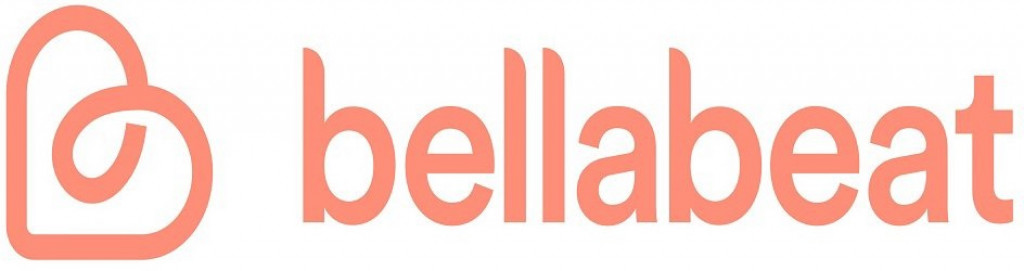

#  How Can a Wellness Technology Company Play It Smart?

This case study is part of the **Google Data Analytics Capstone Project** and my very first portfolio project on Kaggle. I want to thank [Macarena Lacasa](https://www.kaggle.com/macarenalacasa) on Kaggle for her [fascinating work](https://www.kaggle.com/code/macarenalacasa/capstone-case-study-bellabeat) work in this case study. Her work gave me additional guidance to complete my case study.

# About Company

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products.Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly
positioned itself as a tech-driven wellness company for women.


# 1. Ask phase:

## Business Task

**Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices.**

## stakeholders

*  Urška Sršen:  Bellabeat’s cofounder and Chief Creative Officer

*  Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

*   Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and
    reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have
    been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst,
    can help Bellabeat achieve them.
    
    
## Questions for the analysis

* 1. What are some trends in smart device usage?

* 2. How could these trends apply to Bellabeat customers?

* 3. How could these trends help influence Bellabeat marketing strategy?

# 2. Prepare phase:

## Data Source used:

The data source used for this case study is [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit). This dataset is stored in Kaggle and was made available by MÖBIUS.

## Data Organization:

The dataset contains **18 tables**. Some of them are in the long format of their alternate version (wide format), and some are the merged version of several tables. For several metrics, like number of steps and active minutes. The dataset provides daily, hourly, and minute_level of data.

## Bias and Credibility:

* The dataset only contains information of **30 to 33 participants** and does not contain any demographic information about Bellabeat's users. As there is limitation of size, this 
  dataset does not represent the population as a whole. Therefore, the dataset is biased.
  
* As for the credibility, The dataset is not current and has a time limitation on the survey (2 months long).

## License and Accessibility:

* This dataset is licensed as [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).

* People get the free access, usage, and sharing of the data to perform their work, even for commercial purposes, all without asking permission.


# 3. Process phase:

## Loading Packages

* **tidyverse**:  an opinionated collection of R packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures. It loads multiple packages at once, with ggplot2, dplyr, and tibble as some of the most popular ones.

* **lubridate**: makes it easier to work with dates and times.

* **dplyr**: is a structure of data manipulation that provides a uniform set of verbs, helping to resolve the most frequent data manipulation hurdles.

* **ggplot**: It can greatly improve the quality and aesthetics of your graphics, and will make you much more efficient in creating them.

* **tidyr**:  contains tools for changing the shape (pivoting) and hierarchy (nesting and 'unnesting') of a dataset, turning deeply nested lists into rectangular data frames ('rectangling'), and extracting values out of string columns. It also includes tools for working with missing values (both implicit and explicit).

* **janitor**: has simple functions for examining and cleaning dirty data.



In [1]:
library("tidyverse")
library("lubridate")
library("dplyr")
library("ggplot2")
library("tidyr")
library("janitor")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## 3.1 **Importing Datasets**

I am using *6* datasets these are,
* **dailyActivity_merged.csv** ,
* **hourlyIntensities_merged.csv**, 
* **hourlySteps_merged.csv**,  
* **heartrate_seconds_merged.csv**,  
* **sleepDay_merged.csv**,  
* **weightLogInfo_merged.csv**.  

In [2]:

activity<-read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

intensity<-read.csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

steps<-read.csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

heartrate<-read.csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

sleep<-read.csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

weight<-read.csv(file="../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 3.2 Exploring and cleaning the datasets

In [3]:
head(activity)
head(intensity)
head(steps)
head(heartrate)
head(sleep)
head(weight)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


### 3.2.1.  Exploring the number of ids in id column.

In [4]:
n_distinct(activity$Id)
n_distinct(intensity$Id)
n_distinct(steps$Id)
n_distinct(heartrate$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 14

[1] 24

[1] 8

 id represents a participant and it is a unique number, therefore we need dataset that has moderate number of ids so that we can perform analysis on it.

 The number of participants in activity dataset are **33**, intensity has **33**, steps has **33**, sleep has **24**, heartrate has **14** and weight has only **8**.

 Only **8** participants recorded their weight and **14** recorded their heartrate. This date is not significant to make any recommendations and conclusions. 

 Therefore, for this project I am using only the **activity**, **intensity**, **steps**, **sleep datasets**.

### 3.2.2. Cleaning

In [5]:
colnames(activity)
colnames(intensity)
colnames(steps)
colnames(sleep)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"

[1] "Id"           "ActivityHour" "StepTotal"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

* column names in all the four datasets are not formatted correctly. Therefore, lets use the **clean_name()** function to make all the column names in small letters.

In [6]:
activity <- clean_names(activity)
sleep <- clean_names(sleep)
steps <- clean_names(steps)
intensity<-clean_names(intensity)

colnames(activity)
colnames(sleep)
colnames(steps)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

[1] "id"            "activity_hour" "step_total"

According to the naming conventions in R, it is a good practice to only use lowercase letters, numbers and underscores to name the columns.

### 3.2.3. Removing Duplicates

In [7]:
sum(duplicated(activity))
sum(duplicated(sleep))
sum(duplicated(steps))

[1] 0

[1] 3

[1] 0

* **sleep** dataframe has **3** duplicate values. 

In [8]:
# Removing duplicate values

sleep <- sleep %>%
  distinct() %>%
  drop_na()

In [9]:
sum(duplicated(activity))
sum(duplicated(sleep))
sum(duplicated(steps))

[1] 0

[1] 0

[1] 0

### 3.2.4. Formatting 

In [10]:
# activity

glimpse(activity)

Rows: 940
Columns: 15
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/1…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

In [11]:
# formatting activity_date as "%m/%d/%Y and renaming it as date. I am using the as.POSIXct() as it is useful to convert strings to any format we want.
activity$activity_date=as.POSIXct(activity$activity_date, format="%m/%d/%Y", tz="")
activity$date <- format(activity$activity_date, format = "%m/%d/%y")
glimpse(activity)

Rows: 940
Columns: 16
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

In [12]:
# intensity
glimpse(intensity)

Rows: 22,099
Columns: 4
$ id                <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ activity_hour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/…
$ total_intensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, …
$ average_intensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.…


In [13]:

# Here I am spliting activity_hour in two columns date and time and formatting them as "%m/%d/%y", "%H:%M:%S" respectively.

intensity$activity_hour =as.POSIXct(intensity$activity_hour , format="%m/%d/%Y %H:%M:%S %p", tz="")
intensity$time <- format(intensity$activity_hour, format = "%H:%M:%S")
intensity$date <- format(intensity$activity_hour, format = "%m/%d/%y")

glimpse(intensity)

# Simmilary, we will format other datasets.

Rows: 22,099
Columns: 6
$ id                <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ activity_hour     <dttm> 2016-04-12 12:00:00, 2016-04-12 01:00:00, 2016-04-1…
$ total_intensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, …
$ average_intensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.…
$ time              <chr> "12:00:00", "01:00:00", "02:00:00", "03:00:00", "04:…
$ date              <chr> "04/12/16", "04/12/16", "04/12/16", "04/12/16", "04/…


In [14]:

# steps

glimpse(steps)

Rows: 22,099
Columns: 3
$ id            <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039603…
$ activity_hour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/2…
$ step_total    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, …


In [15]:

steps$activity_hour=as.POSIXct(steps$activity_hour , format="%m/%d/%Y %H:%M:%S %p", tz="")
steps$time <- format(steps$activity_hour, format = "%H:%M:%S")
steps$date <- format(steps$activity_hour, format = "%m/%d/%y")

glimpse(steps)

Rows: 22,099
Columns: 5
$ id            <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039603…
$ activity_hour <dttm> 2016-04-12 12:00:00, 2016-04-12 01:00:00, 2016-04-12 02…
$ step_total    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, …
$ time          <chr> "12:00:00", "01:00:00", "02:00:00", "03:00:00", "04:00:0…
$ date          <chr> "04/12/16", "04/12/16", "04/12/16", "04/12/16", "04/12/1…


In [16]:
# sleep
glimpse(sleep)

Rows: 410
Columns: 5
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM",…
$ total_sleep_records  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…


In [17]:
sleep$sleep_day  <-as.POSIXct(sleep$sleep_day  , format="%m/%d/%Y %H:%M:%S %p", tz="")
sleep$time <- format(sleep$sleep_day, format = "%H:%M:%S")
sleep$date <- format(sleep$sleep_day, format ="%m/%d/%y")
glimpse(sleep)

Rows: 410
Columns: 7
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <dttm> 2016-04-12 12:00:00, 2016-04-13 12:00:00, 2016-0…
$ total_sleep_records  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…
$ time                 <chr> "12:00:00", "12:00:00", "12:00:00", "12:00:00", "…
$ date                 <chr> "04/12/16", "04/13/16", "04/15/16", "04/16/16", "…


*  I have cleaned the four datasets, activity, intensity, steps and sleep, which I will be using for my analysis.

# 4. Analyze phase:

* Let's first see, the column names of the datasets we are using, to select useful columns from them and analyze them accordingly.

## 4.1. Summarizing

In [18]:
print("activity column names")
colnames(activity)

print("intensity column names")
colnames(intensity)

print("steps column names")
colnames(steps)

print("sleep column names")
colnames(sleep)

[1] "activity column names"


[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "date"

[1] "intensity column names"


[1] "id"                "activity_hour"     "total_intensity"  
[4] "average_intensity" "time"              "date"

[1] "steps column names"


[1] "id"            "activity_hour" "step_total"    "time"         
[5] "date"

[1] "sleep column names"


[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"    "time"                
[7] "date"

In [19]:
# activity
activity %>%  
  select(total_steps,
         total_distance,
         sedentary_minutes, calories,very_active_distance, fairly_active_minutes, lightly_active_minutes
         ) %>%
  summary()
print("----------------------------------------------------------------------------")

# sleep
sleep %>%
  select(total_sleep_records, total_minutes_asleep, total_time_in_bed) %>%
  summary()
print("----------------------------------------------------------------------------")

# intensity
intensity %>% 
  select(
    total_intensity, average_intensity
  ) %>% 
  summary()
print("----------------------------------------------------------------------------")

# steps
steps %>% 
  select(
    step_total) %>% 
  summary()

  total_steps    total_distance   sedentary_minutes    calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0    Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8    1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5    Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2    Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5    3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0    Max.   :4900  
 very_active_distance fairly_active_minutes lightly_active_minutes
 Min.   : 0.000       Min.   :  0.00        Min.   :  0.0         
 1st Qu.: 0.000       1st Qu.:  0.00        1st Qu.:127.0         
 Median : 0.210       Median :  6.00        Median :199.0         
 Mean   : 1.503       Mean   : 13.56        Mean   :192.8         
 3rd Qu.: 2.053       3rd Qu.: 19.00        3rd Qu.:264.0         
 Max.   :21.920       Max.   :143.00        Max.   :518.0         

[1] "----------------------------------------------------------------------------"


 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.00        Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.00        1st Qu.:361.0        1st Qu.:403.8    
 Median :1.00        Median :432.5        Median :463.0    
 Mean   :1.12        Mean   :419.2        Mean   :458.5    
 3rd Qu.:1.00        3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.00        Max.   :796.0        Max.   :961.0    

[1] "----------------------------------------------------------------------------"


 total_intensity  average_intensity
 Min.   :  0.00   Min.   :0.0000   
 1st Qu.:  0.00   1st Qu.:0.0000   
 Median :  3.00   Median :0.0500   
 Mean   : 12.04   Mean   :0.2006   
 3rd Qu.: 16.00   3rd Qu.:0.2667   
 Max.   :180.00   Max.   :3.0000   

[1] "----------------------------------------------------------------------------"


   step_total     
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   40.0  
 Mean   :  320.2  
 3rd Qu.:  357.0  
 Max.   :10554.0  

** **Discoveries from this summary**:**

* From the activity summary, I found that average sedentary time is **991** minutes or **16 hours**. Maybe, this is the total time in which the participants work and take a rest during the day.

* As the **age** of the participants are not given, so let us assume that the participants age is in the range between **20** to **40**. According to the article, [How many calories do I burn a day? Your calculator](https://www.womenshealthmag.com/uk/fitness/fat-loss/a40772564/how-many-calories-do-i-burn-a-day/), the average calories that a person should burn in a day is around **1,800-2,000 calories**, assuming that their **calorie** intake is **2,000**. By analyzing the activity dataframe we see that, on average the Bellabeat users are burning **2,304 calories** per day, which is great. But still, we don't have enough data to state that the users are achieving their weight lose goals or not, as there are only few of them have recorded their weight. None of them have recorded their heights, muscle-to-fat ratio which are essential parameters to estimate calorie-burn. 

* On an average, participants sleep **1** time for **7 hours**.

* Average total steps per day **7,638**, which is less. In the article [How Many Steps Do I Need a Day?](https://www.healthline.com/health/how-many-steps-a-day), to lose weight you should complete **10,000 steps per day**.  

## 4.2. Merging datasets

In [20]:
# I am going to merge intensity and activity by columns id and date.

merged_data=merge(intensity,activity,by=c("id","date"))
view(merged_data)
merged_data %>% 
  select(
    total_intensity,calories
  ) %>% 
  summary()

# I am also going to merge sleep and activity by columns id and date.
sleep_activity_merged=merge(sleep,activity,by=c("id","date"))
view(sleep_activity_merged)
sleep_activity_merged %>% 
  select(
    total_minutes_asleep, sedentary_minutes
  ) %>% 
  summary()

 total_intensity     calories   
 Min.   :  0.00   Min.   : 120  
 1st Qu.:  0.00   1st Qu.:1841  
 Median :  3.00   Median :2162  
 Mean   : 12.04   Mean   :2336  
 3rd Qu.: 16.00   3rd Qu.:2799  
 Max.   :180.00   Max.   :4900  

 total_minutes_asleep sedentary_minutes
 Min.   : 58.0        Min.   :   0.0   
 1st Qu.:361.0        1st Qu.: 631.2   
 Median :432.5        Median : 717.0   
 Mean   :419.2        Mean   : 712.1   
 3rd Qu.:490.0        3rd Qu.: 782.8   
 Max.   :796.0        Max.   :1265.0   

* Let's further analyze the sleep_activity_merged

In [21]:
sleep_activity_merged=merge(sleep,activity,by=c("id","date"))
glimpse(sleep_activity_merged)

Rows: 410
Columns: 21
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ date                       <chr> "04/12/16", "04/13/16", "04/15/16", "04/16/…
$ sleep_day                  <dttm> 2016-04-12 12:00:00, 2016-04-13 12:00:00, …
$ total_sleep_records        <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep       <int> 327, 384, 412, 340, 700, 304, 360, 325, 361…
$ total_time_in_bed          <int> 346, 407, 442, 367, 712, 320, 377, 364, 384…
$ time                       <chr> "12:00:00", "12:00:00", "12:00:00", "12:00:…
$ activity_date              <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-0…
$ total_steps                <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 105…
$ total_distance             <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6…
$ tracker_distance           <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_dist

In [22]:
daily_mean <- sleep_activity_merged %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(total_steps), mean_daily_calories = mean(calories), mean_daily_sleep = mean(total_minutes_asleep))

head(daily_mean)

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


* I will classify our users by the mean daily calories.

In [23]:
classify_user <- daily_mean %>%
  mutate(classify_user = case_when(
    mean_daily_calories < 1800 ~ "sedentary",
    mean_daily_calories >= 1800 & mean_daily_calories < 2000 ~ "active", 
    mean_daily_calories >= 2000 ~ "very active"
  ))

head(classify_user)

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,classify_user
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,active
1644430081,7967.750,2977.750,294.0000,very active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,very active
2026352035,5618.679,1540.786,506.1786,sedentary
2320127002,5079.000,1804.000,61.0000,active


* Let's create a column to see user percentage.

In [24]:
user_type_percent <- classify_user %>%
  group_by(classify_user) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(classify_user) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

user_type_percent$classify_user <- factor(user_type_percent$classify_user , levels = c("very active", "active", "sedentary"))


head(user_type_percent)

classify_user,total_percent,labels
<fct>,<dbl>,<chr>
active,0.2083333,20.8%
sedentary,0.1250000,12.5%
very active,0.6666667,66.7%


* As we can see that all the participans are using are using Bellabeat devices everyday.

# 5. Share phase:

## 5.1. Visualization

In [25]:
# finding correlations

steps_calorie_correlation = cor(activity$total_steps,activity$calories)

min_asleep_timeinbed_cor= cor(sleep$total_minutes_asleep,sleep$total_time_in_bed)

minalseep_sed_min =cor(sleep_activity_merged$total_minutes_asleep,sleep_activity_merged$sedentary_minutes)

steps_calorie_correlation

min_asleep_timeinbed_cor

minalseep_sed_min

[1] 0.5915681

[1] 0.9304224

[1] -0.6010731

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


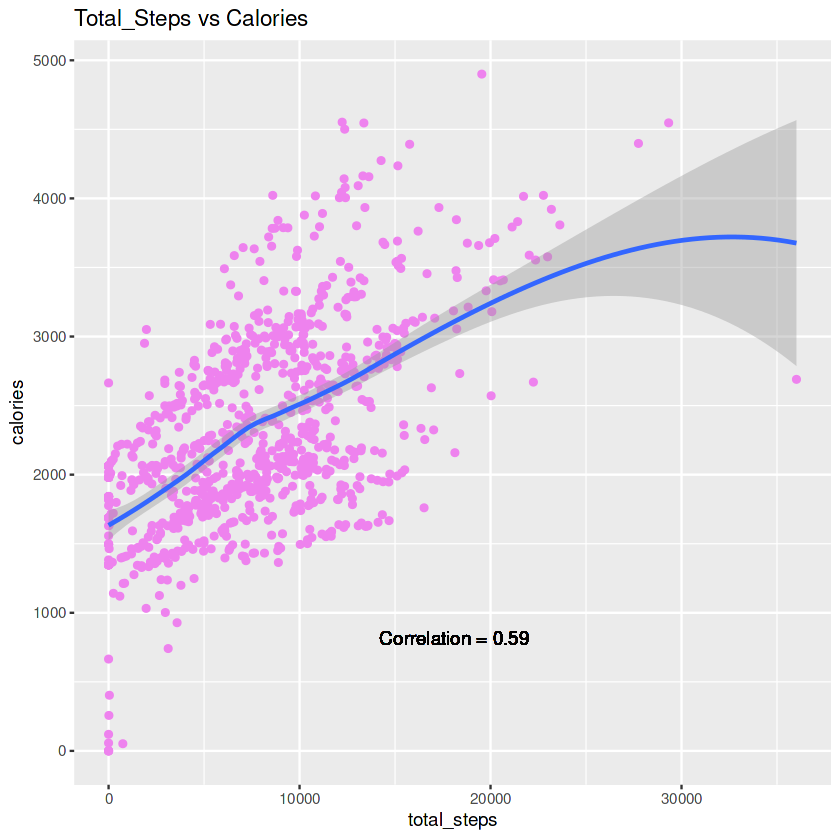

In [26]:
ggplot(data=activity, aes(x=total_steps, y= calories)) + 
  geom_point( color="violet",alpha=1) + geom_smooth() + labs(title="Total_Steps vs Calories")+
  geom_text(aes(label=paste("Correlation =", round(steps_calorie_correlation,2))),
            x=Inf,y=-Inf,hjust=3,  vjust=-10)

* There is a moderately positive correlation **(r= 0.59)** between total steps and calories. More steps we complete, More calories we will burn. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


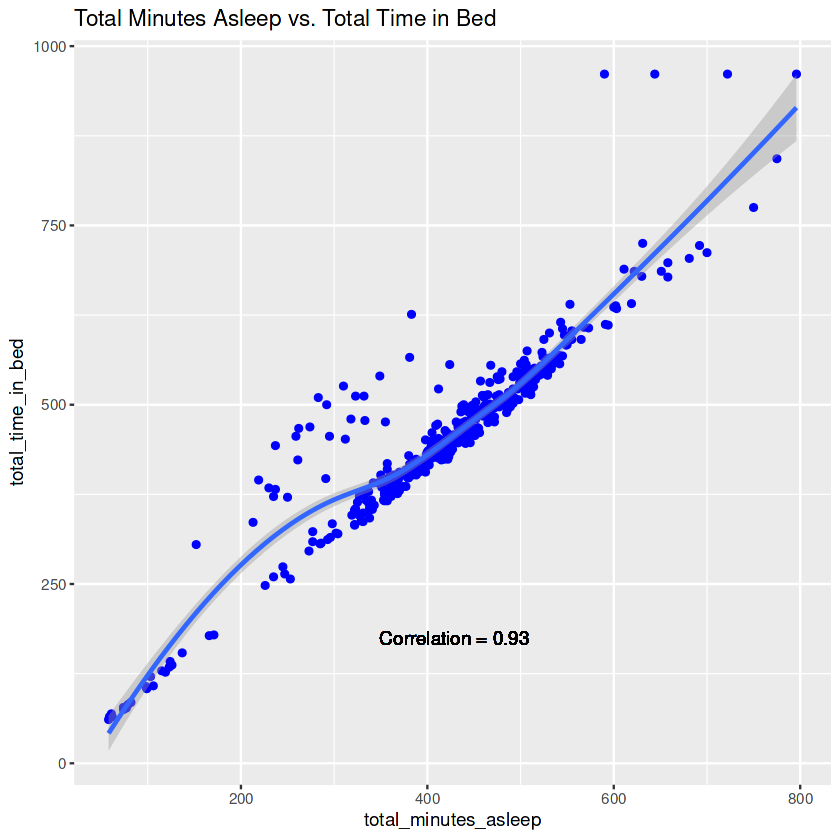

In [27]:
ggplot(data=sleep, aes(x=total_minutes_asleep, y=total_time_in_bed)) + 
  geom_point(color="blue",alpha=1)+ geom_smooth()+
labs(title="Total Minutes Asleep vs. Total Time in Bed")+
  geom_text(aes(label=paste("Correlation =", round(min_asleep_timeinbed_cor,2))),
            x=Inf,y=-Inf,hjust=3,  vjust=-10)

* There is a high positive correlation **(r= 0.93)** between Total Minutes Asleep and Total Time in Bed. 

* Let's see at what time of the day the users are more **active** by using the **intensity data**.

In [28]:
mean_int<- intensity   %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(total_intensity))
glimpse(mean_int)

Rows: 12
Columns: 2
$ time           <chr> "01:00:00", "02:00:00", "03:00:00", "04:00:00", "05:00:…
$ mean_total_int <dbl> 10.040992, 9.898598, 7.940476, 9.058728, 13.184984, 14.…


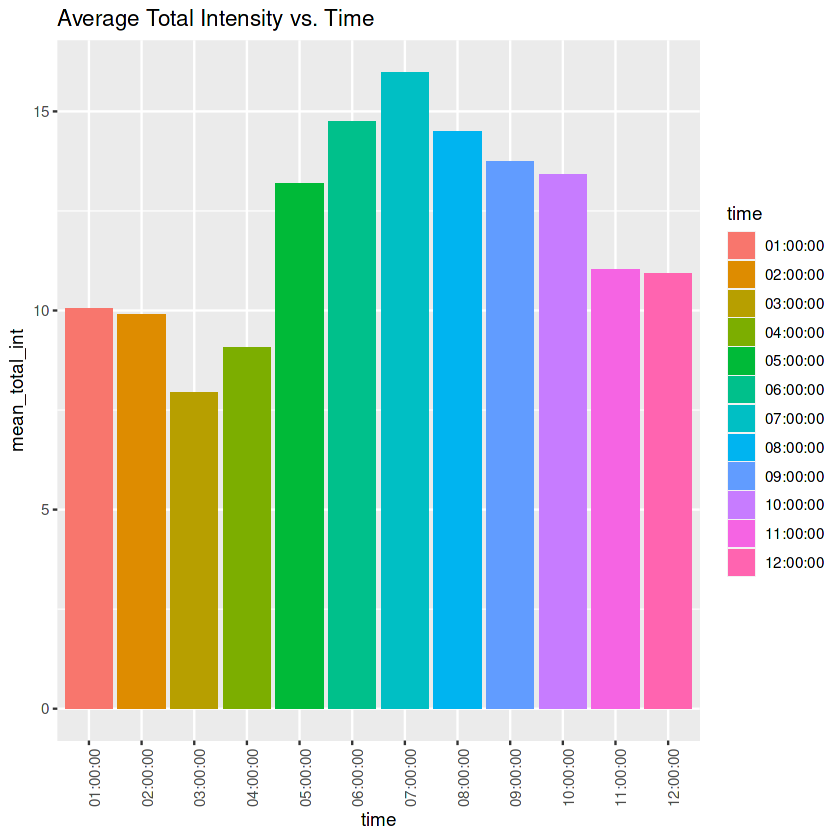

In [29]:
ggplot(data = mean_int, aes(x=time,y = mean_total_int,fill=time))+
geom_bar(stat="identity", position = "dodge")+
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Average Total Intensity vs. Time")


* We can see that most activity happens between **5 pm** and **7 pm**. I suppose, that they go to gym or do some other physical exercise like cycling, walking ,etc.

* Let's see what kind of relationship is their between **Total Minutes Asleep** and **Sedentry Minutes**.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


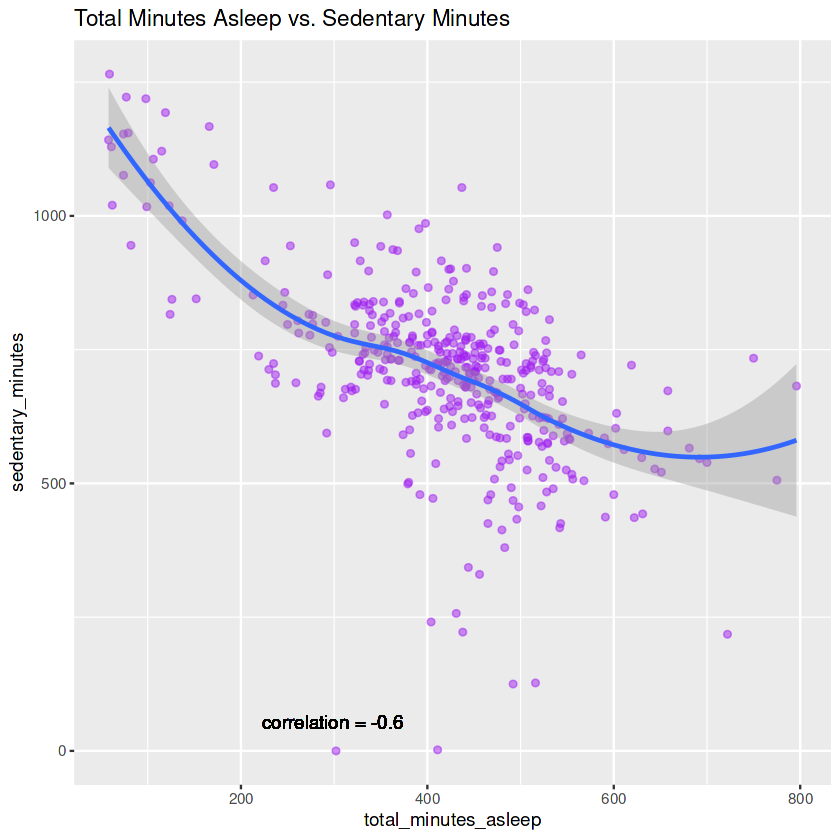

In [30]:
ggplot(data=sleep_activity_merged, aes(x=total_minutes_asleep, y=sedentary_minutes)) + 
  geom_point(color='purple',alpha=0.5) + geom_smooth() +
  labs(title="Total Minutes Asleep vs. Sedentary Minutes")+
  geom_text(aes(label=paste("correlation =",round(minalseep_sed_min,2))),
                x=Inf,y=-Inf,hjust=4,vjust=-4)

* There is a  negative correlation **(r=-0.6)** between Sedentary Minutes and Sleep time.

* Let's create a **pie chart** to represent the **user types** based on their calories-burned per day

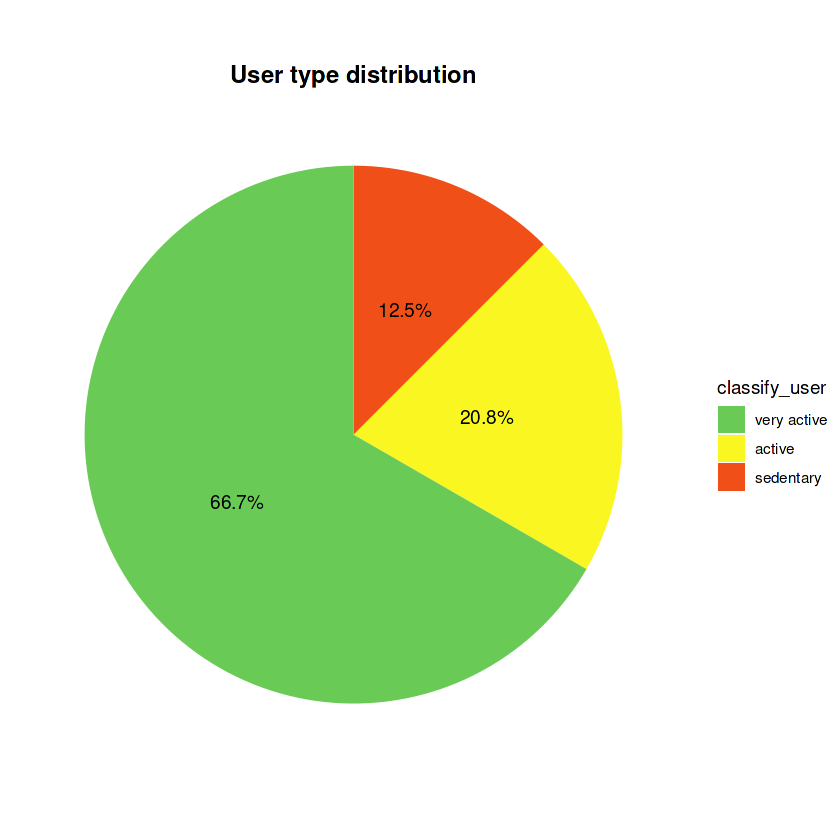

In [31]:
user_type_percent %>%
  ggplot(aes(x="",y=total_percent, fill=classify_user)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#6ACA56","#FAF621", "#F05018")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  labs(title="User type distribution")


* **12.5%** of the users are not very active but the rest **87.5%** are doing great in terms of burning their calories. 

# 6. Conclusion and Recommendation

After doing Analysis on the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit),
I have found some interesting insights that I would like to pinpoint. These insights would help influence **Bellabeat marketing strategy team**.

**Target Audience**

Women who work full-time jobs (according to the hourly intensity data) and spend a lot of time in being inactive or who have sitting jobs/in a meeting/in front of a computer and focusing on their work (according to the sedentary time data).

These women (according to the user type data) are burning required amount of calories per day. Majority of them **are not following** the **10,000 steps per day** mark **but still interestingly, manage to burn the required amount of calories in day**.

* The demographic information about the participants is not given and there are only handful of participants **(33)** on which these analysis is performed. Therefore, more data is needed for further analysis.

## Ideas for Bellabeat app

**1.** As majority of bellabeat users have an average sedentary time of **16 hours**, the bellabeat developers can introduce a notifying system that can notify the users to walk or stand for a while.

**2.** Bellabeat app must get the information regarding height, weight, a calculator to measure muscle-to-fat ratio, to accurately count the weight lose or weight gain goals of its users.

**3.** To stay healthy and fit the Bellabeat users should walk **10,000 steps per day** as mentioned **How Many Steps Do I Need a Day?** article but on average they complete only **7,638 steps in a day**. Therefore, a notification to complete the required amount of steps must be shown by the Bellabeat app.

**4.** Sedentary Minutes and  Average Sleep time column have a negative correlation **(r=-0.6)**. Therefore, a **go to sleep** notification must be send by the Bellabeat app so that the users get good sleep.

**Thank you**, for reading my case study on Bellabeat fitness app!

This is my first project using R language. I would appreciate any comments and recommendations for improvement!